In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv(r"D:\Projects\SummerDir\datasets\Churn_Modelling.csv")

In [3]:
ds.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
y = ds['Exited']

In [6]:
X = ds[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [7]:
geo = ds['Geography']

In [8]:
geo = pd.get_dummies(geo,drop_first=True)

In [9]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
gender = ds['Gender']

In [11]:
gender = pd.get_dummies(gender,drop_first=True)

In [12]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
X_final = pd.concat([X,gender,geo],axis=1)

In [14]:
X_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.20,random_state=42)

In [17]:
X_train.shape

(8000, 11)

In [18]:
X_test.shape

(2000, 11)

In [19]:
from keras.models import Sequential

In [20]:
model = Sequential()

In [21]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [22]:
from keras.layers import Dense

In [23]:
model.add(Dense(bias_initializer="zeros",kernel_initializer="zeros",activation="relu",units=8,input_dim=11))

In [24]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.get_layer("dense").get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [27]:
model.add(Dense(activation="relu",units=6,))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.get_layer("dense_1").get_weights()

[array([[-0.49152094, -0.1400035 , -0.5116325 ,  0.02758074,  0.5632763 ,
          0.44011378],
        [ 0.64517987, -0.3058091 , -0.23333856, -0.5492666 ,  0.10966074,
         -0.11597317],
        [ 0.22578049, -0.07194006,  0.24786615, -0.45573312,  0.01902044,
         -0.22384426],
        [ 0.41870892, -0.17941314,  0.2776    , -0.43355364,  0.36317265,
         -0.64957213],
        [-0.3281923 ,  0.6353388 ,  0.05941761, -0.21642524,  0.4272622 ,
         -0.5438083 ],
        [-0.06821138,  0.64281344,  0.21152335, -0.5523492 , -0.20883766,
         -0.565596  ],
        [-0.01958698, -0.56174767, -0.2374329 ,  0.60488427, -0.6110787 ,
         -0.44184268],
        [-0.4093051 , -0.24681261, -0.0561043 ,  0.6388687 , -0.2038435 ,
          0.06975317]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [30]:
model.add(Dense(activation="sigmoid",units=1,))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow as tf
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.Accuracy()],)

In [35]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 2ms/step - loss: 0.5005 - accuracy: 0.8000
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5066 - accuracy: 0.7955
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5111 - accuracy: 0.7921
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7971
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5148 - accuracy: 0.7894
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5109 - accuracy: 0.7923
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5089 - accuracy: 0.7938
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7868
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5060 - accuracy: 0.7959
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5079 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.7918
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5087 - accuracy: 0.7939
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8003
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5090 - accuracy: 0.7937
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5103 - accuracy: 0.7927
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7962
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7967
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.8000
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7926
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 

In [36]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.49152094, -0.1400035 , -0.5116325 ,  0.02758074,  0.5632763 ,
          0.44011378],
        [ 0.64517987, -0.3058091 , -0.23333856, -0.5492666 ,  0.10966074,
         -0.11597317],
        [ 0.22578049, -0.07194006,  0.24786615, -0.45573312,  0.01902044,
         -0.22384426],
        [ 0.41870892, -0.17941314,  0.2776    , -0.43355364,  0.36317265,
         -0.64957213],
        [-0.3281923 ,  0.6353388 ,  0.05941761, -0.21642524,  0.4272622 ,
  

In [37]:
l = pd.DataFrame(model.history.history)

<AxesSubplot:>

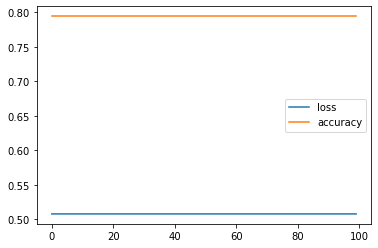

In [38]:
l.plot()